# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [112]:
import numpy as np
#from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")
#mnist = fetch_mldata('MNIST original')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [113]:
X.shape

(70000, 784)

In [114]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [9]:
X.iloc[36000]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 36000, Length: 784, dtype: float64

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

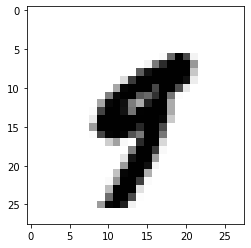

In [17]:
# plot single row
import matplotlib

reshaped = X.iloc[36000].values.reshape(28, 28)
plt.imshow(reshaped, cmap=matplotlib.cm.binary, interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [11]:
# X is an image of y value
y.iloc[36000]

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for testing.

In [116]:
# train-test split by index
X_train = X.iloc[:60000]
X_test = X.iloc[60000:]
y_train = y.iloc[:60000]
y_test = y.iloc[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [117]:
# locate rows with output 5
just5s = np.where(y=='5')

In [120]:
# assign train-test split
X_train_5 = X.iloc[just5s][:60000]
X_test_5 = X.iloc[just5s][60000:]
y_train_5 = y.iloc[just5s]
y_test_5 = y_test.iloc[just5s]

In [123]:
y_test_5

Series([], Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9'])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [121]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_5, y_train_5)
pred_5 = lr.predict(X_test_5)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: '5'

In [85]:
# return prediction frequencies
np.unique(pred_5, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([  68,   20,   41,  194,   59, 5569,   93,   21,  195,   53],
       dtype=int64))

In [66]:
# frequency of 5s is much higher than for other numbers, the prediction worked pretty good
5569/sum([  68,   20,   41,  194,   59, 5569,   93,   21,  195,   53])

0.8821479486773325

### Does the classifier predict correctly the 36000th digit we picked before?

In [77]:
nine = X.iloc[36000].values.reshape(1, -1)

In [78]:
lr.predict(nine)

C:\Users\Shinemet\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['4'], dtype=object)

*The value predicted is wrong!*

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [79]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [81]:
never_5_clf.fit(X_test_5, y_train)
never_5 = never_5_clf.predict(X_test_5)

In [82]:
# return prediction frequencies: always False
np.unique(never_5, return_counts=True)

(array([False]), array([6313], dtype=int64))

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [102]:
# first convert pred_5 to binary class
binary_5 = np.where(pred_5=='5', True, False)
np.unique(binary_5, return_counts=True)

(array([False,  True]), array([ 744, 5569], dtype=int64))

In [103]:
# also convert y_test_5 to binary
y_test_5_binary = np.where(y_test_5=='5', True, False)

In [104]:
# compare metrics of both models
from sklearn import metrics

print("Metrics for pred_5: ")
print(metrics.confusion_matrix(y_test_5_binary, binary_5))
print(metrics.precision_score(y_test_5_binary, binary_5))
print(metrics.recall_score(y_test_5_binary, binary_5))
print(metrics.f1_score(y_test_5_binary, binary_5))

Metrics for pred_5: 
[[   0    0]
 [ 744 5569]]
1.0
0.8821479486773325
0.9373842787409526


In [105]:
from sklearn import metrics

print("Metrics for never_5: ")
print(metrics.confusion_matrix(y_test_5_binary, never_5))
print(metrics.precision_score(y_test_5_binary, never_5))
print(metrics.recall_score(y_test_5_binary, never_5))
print(metrics.f1_score(y_test_5_binary, never_5))

Metrics for never_5: 
[[   0    0]
 [6313    0]]
0.0
0.0
0.0


C:\Users\Shinemet\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*I should have a higher score on True negatives in never_5 matrix, probably with some good scores on other metrics as well.*

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

*Without knowing the model, the dumb classifier metrics could be interpreted as the results of a better fit. We can deduce from this that any model metrics should be considered with regards to the model used.*

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [106]:
print(metrics.roc_auc_score(y_test_5_binary, binary_5))

fpr, tpr, thresholds = metrics.roc_curve(y_test_5_binary, binary_5)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

### Now find the roc_auc_score for each. 

### What does this metric tell you? Which classifier works better with this metric in mind?